In [1]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TRIAL_DIR = "/Users/eyash.p24/Desktop/MUJ/ML/ATD_ML/dataset/tampered_dataset_small_v2_wav"
audio_files = os.listdir(TRIAL_DIR)
audio_files

['Audio_01_00103_4200s_to_4230s_replace.wav',
 'Audio_01_00126_2010s_to_2040s_normal.wav',
 'Audio_01_00126_2220s_to_2250s_normal.wav',
 'Audio_01_00125_20880s_to_20910s_normal.wav',
 'Audio_01_00103_3300s_to_3330s_replace.wav',
 'Audio_01_00105_390s_to_420s_replace.wav',
 'Audio_01_00127_60s_to_90s_normal.wav',
 'Audio_01_00126_2160s_to_2190s_normal.wav',
 'Audio_01_00126_1890s_to_1920s_normal.wav',
 'Audio_01_00102_120s_to_150s_replace.wav',
 'Audio_01_00126_2100s_to_2130s_normal.wav',
 'Audio_01_00131_60s_to_90s_normal.wav',
 'Audio_01_00126_2310s_to_2340s_normal.wav',
 'Audio_01_00125_20730s_to_20760s_normal.wav',
 'Audio_01_00103_780s_to_810s_replace.wav',
 'Audio_01_00131_240s_to_270s_normal.wav',
 'Audio_01_00126_720s_to_750s_normal.wav',
 'Audio_01_00103_270s_to_300s_replace.wav',
 'Audio_01_00103_1530s_to_1560s_replace.wav',
 'Audio_01_00102_60s_to_90s_replace.wav',
 'Audio_01_00127_0s_to_30s_normal.wav',
 'Audio_01_00103_2550s_to_2580s_replace.wav',
 'Audio_01_00126_2040s_to_

In [3]:
len(audio_files)

400

In [28]:
audio_files[45]

'Audio_01_00128_0s_to_30s_normal.wav'

In [29]:
audio, sr = librosa.load(os.path.join(TRIAL_DIR, audio_files[45]))
print(audio.shape, sr)

(220500,) 22050


In [30]:
ipd.Audio(audio, rate=sr)

In [31]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [32]:
S_audio = librosa.stft(audio, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_audio.shape

(1025, 431)

In [33]:
S_audio.mean(), S_audio.std(), S_audio.min(), S_audio.max()

(np.complex64(-2.1233614e-05+7.189994e-08j),
 np.float32(1.0468142),
 np.complex64(-45.508595-2.0271122j),
 np.complex64(46.38488-11.804521j))

In [34]:
type(S_audio[0][0])

numpy.complex64

In [35]:
Y_scale = np.abs(S_audio) ** 2
Y_scale.shape

(1025, 431)

In [36]:
Y_scale.max(), Y_scale.min(), 

(np.float32(2391.7026), np.float32(2.684673e-21))

In [37]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(
        Y, sr=sr, hop_length=hop_length,
        x_axis="time", 
        y_axis=y_axis
    )
    plt.colorbar(format="%+2.f")

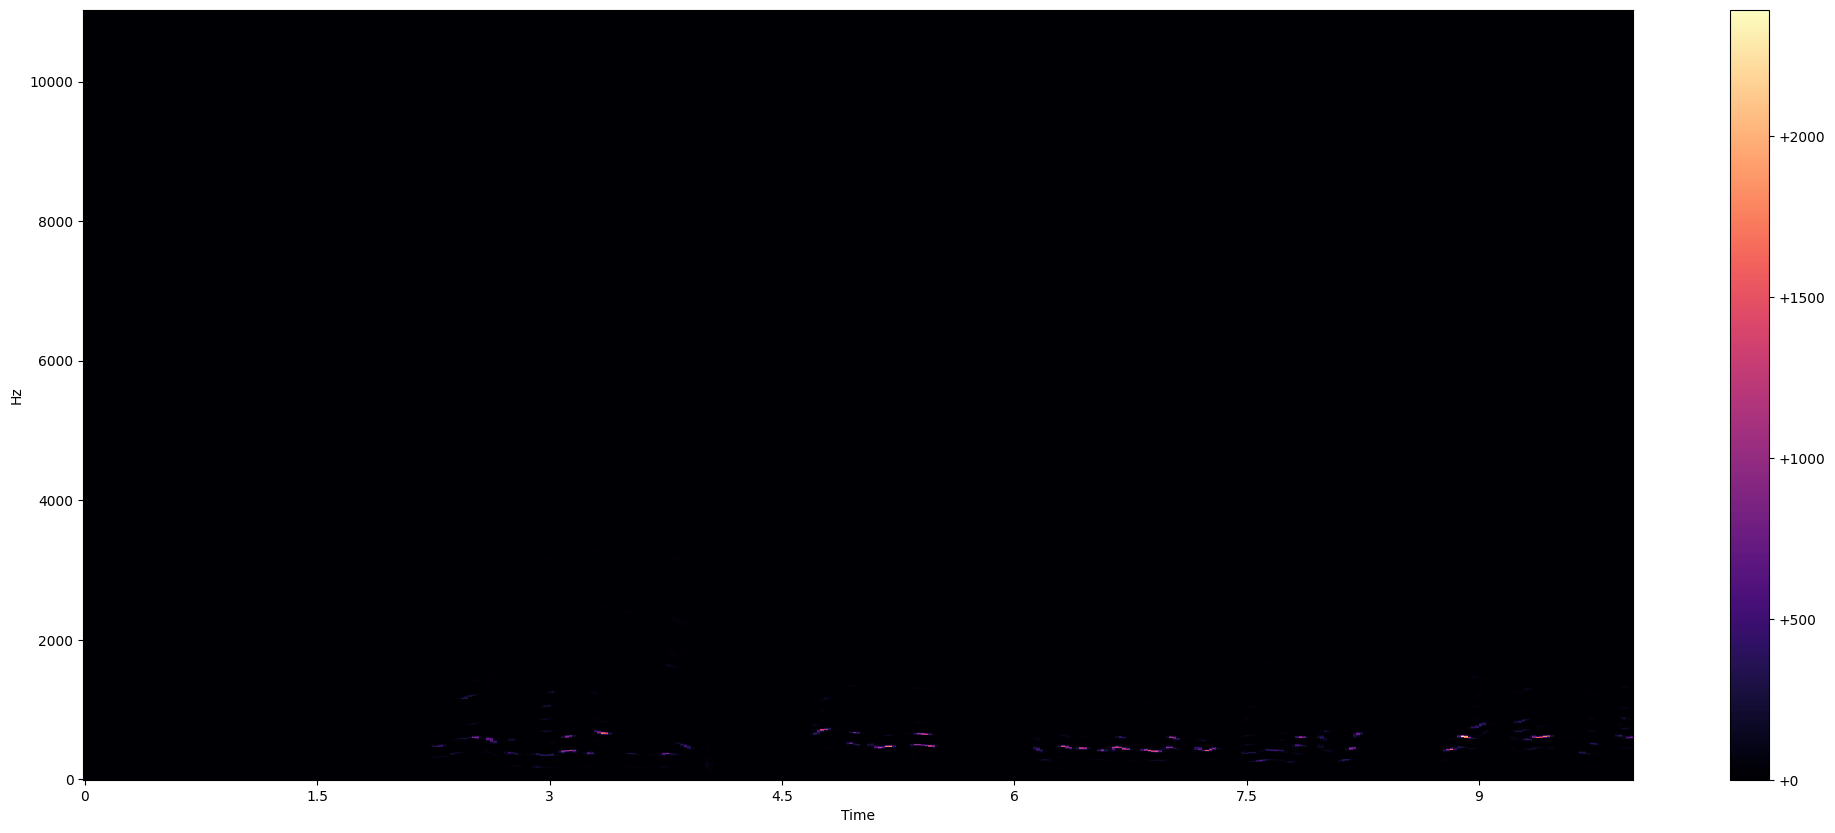

In [38]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)

(1025, 431)


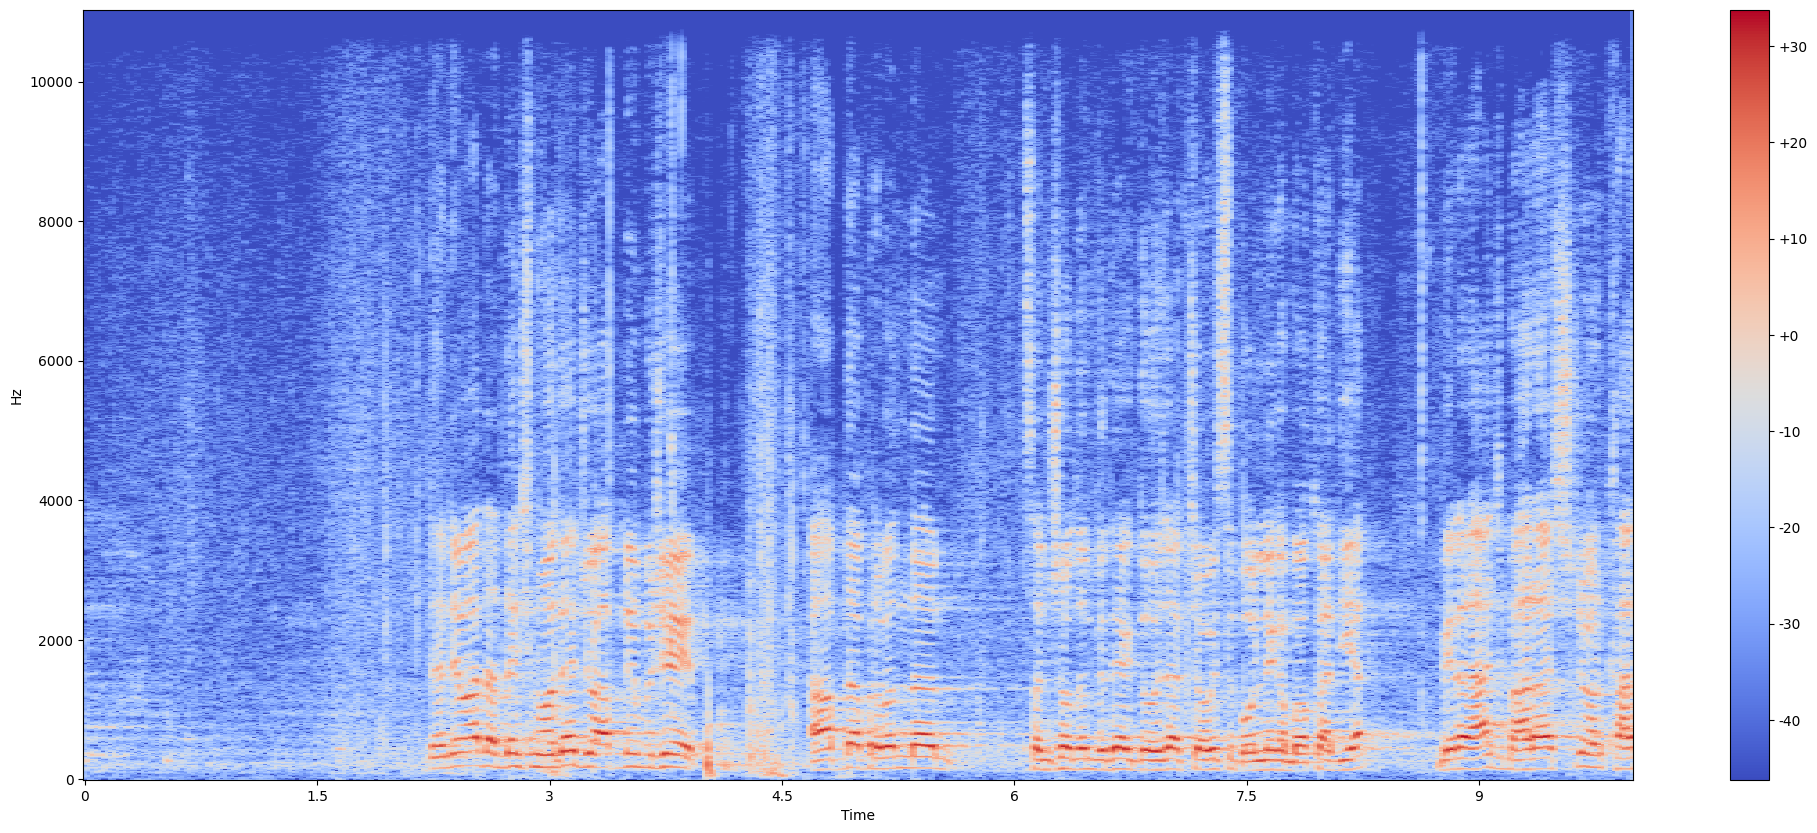

In [39]:
Y_log_scale = librosa.power_to_db(Y_scale)
print(Y_log_scale.shape)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

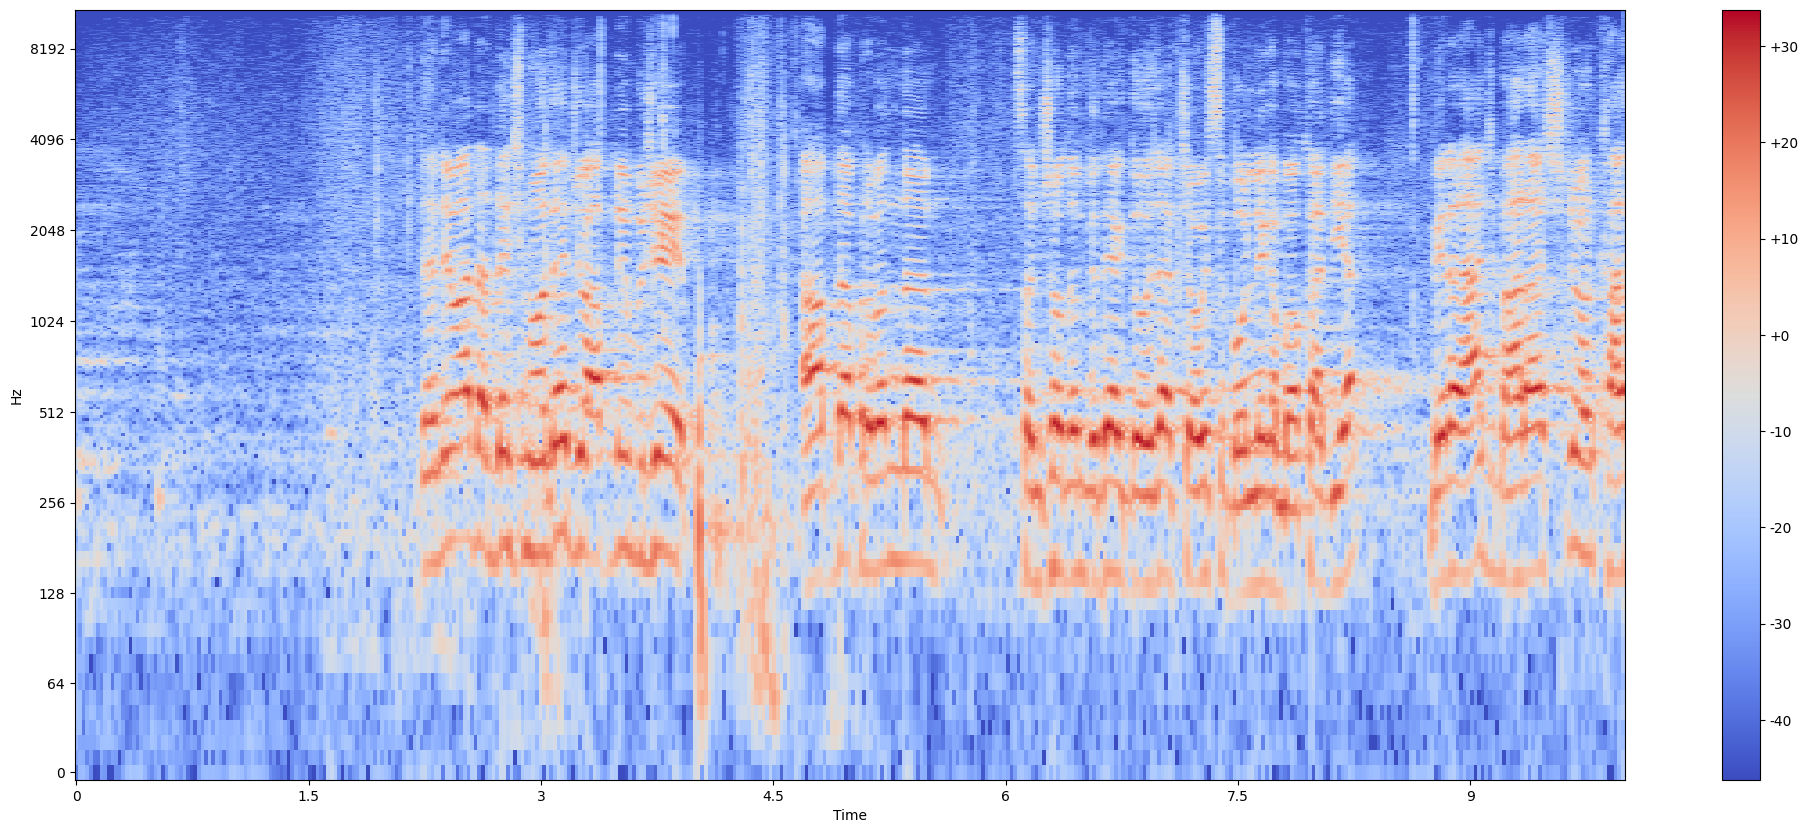

In [40]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")

Text(0.5, 1.0, 'Audio Signal')

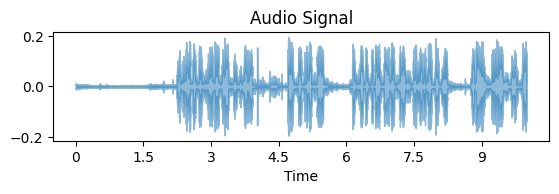

In [41]:
plt.subplot(3,1,1)
librosa.display.waveshow(audio, alpha=0.5)
plt.title("Audio Signal")
# plt.ylim((-1,1))


In [42]:
audio_ft = np.fft.fft(audio)

In [43]:
audio_ft

array([-9.3437901e+00+0.j        , -8.1929136e-03-0.23001195j,
        7.5561452e-01+0.32693574j, ..., -1.9506331e-01+0.04913944j,
        7.5561452e-01-0.32693574j, -8.1929136e-03+0.23001195j],
      dtype=complex64)

In [44]:
magnitude_audio_ft = np.abs(audio_ft)
magnitude_audio_ft[0]

np.float32(9.34379)

In [45]:
def plot_magnitude_spectrum(signal, title, sr, f_ratio=1):
    ft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(ft)
    
    plt.figure(figsize=(18,5))
    
    frequency = np.linspace(0, sr, len(magnitude_spectrum))
    num_frequency_bins = int(len(frequency) * f_ratio)

    plt.plot(frequency[:num_frequency_bins], magnitude_spectrum[:num_frequency_bins])
    plt.xlabel("Frequency (Hz)")
    plt.title(title)
    plt.show()

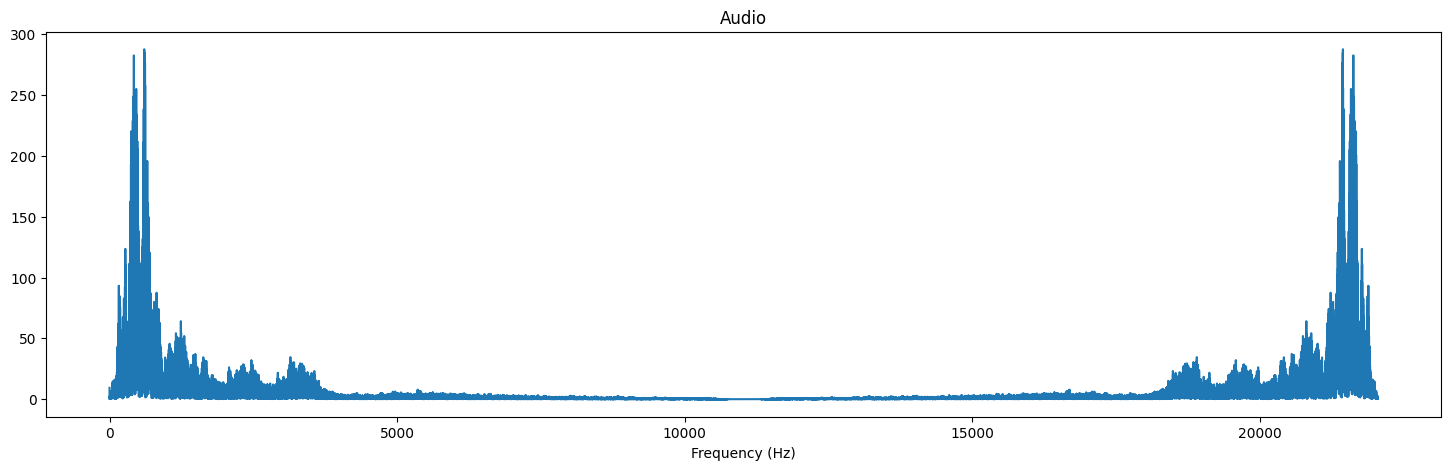

In [46]:
plot_magnitude_spectrum(audio, "Audio", sr)

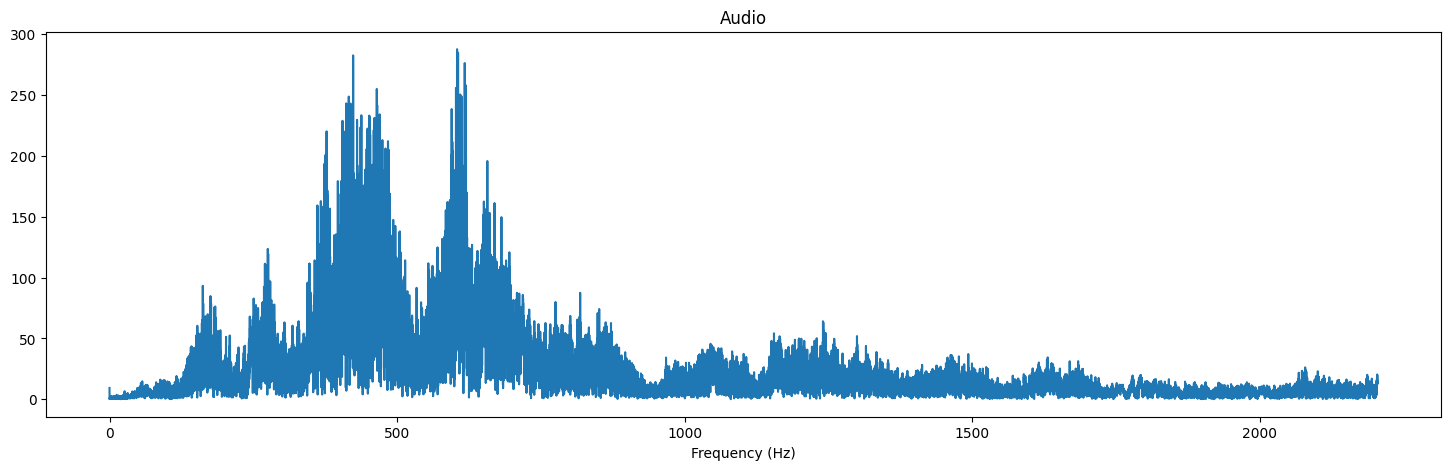

In [47]:
plot_magnitude_spectrum(audio, "Audio", sr, 0.1)

In [48]:
type(audio)

numpy.ndarray

In [49]:
sc_audio = librosa.feature.spectral_centroid(y=audio, sr=sr, n_fft=FRAME_SIZE, hop_length=512)[0]

frames = range(len(sc_audio))
t = librosa.frames_to_time(frames)
t.shape

(431,)

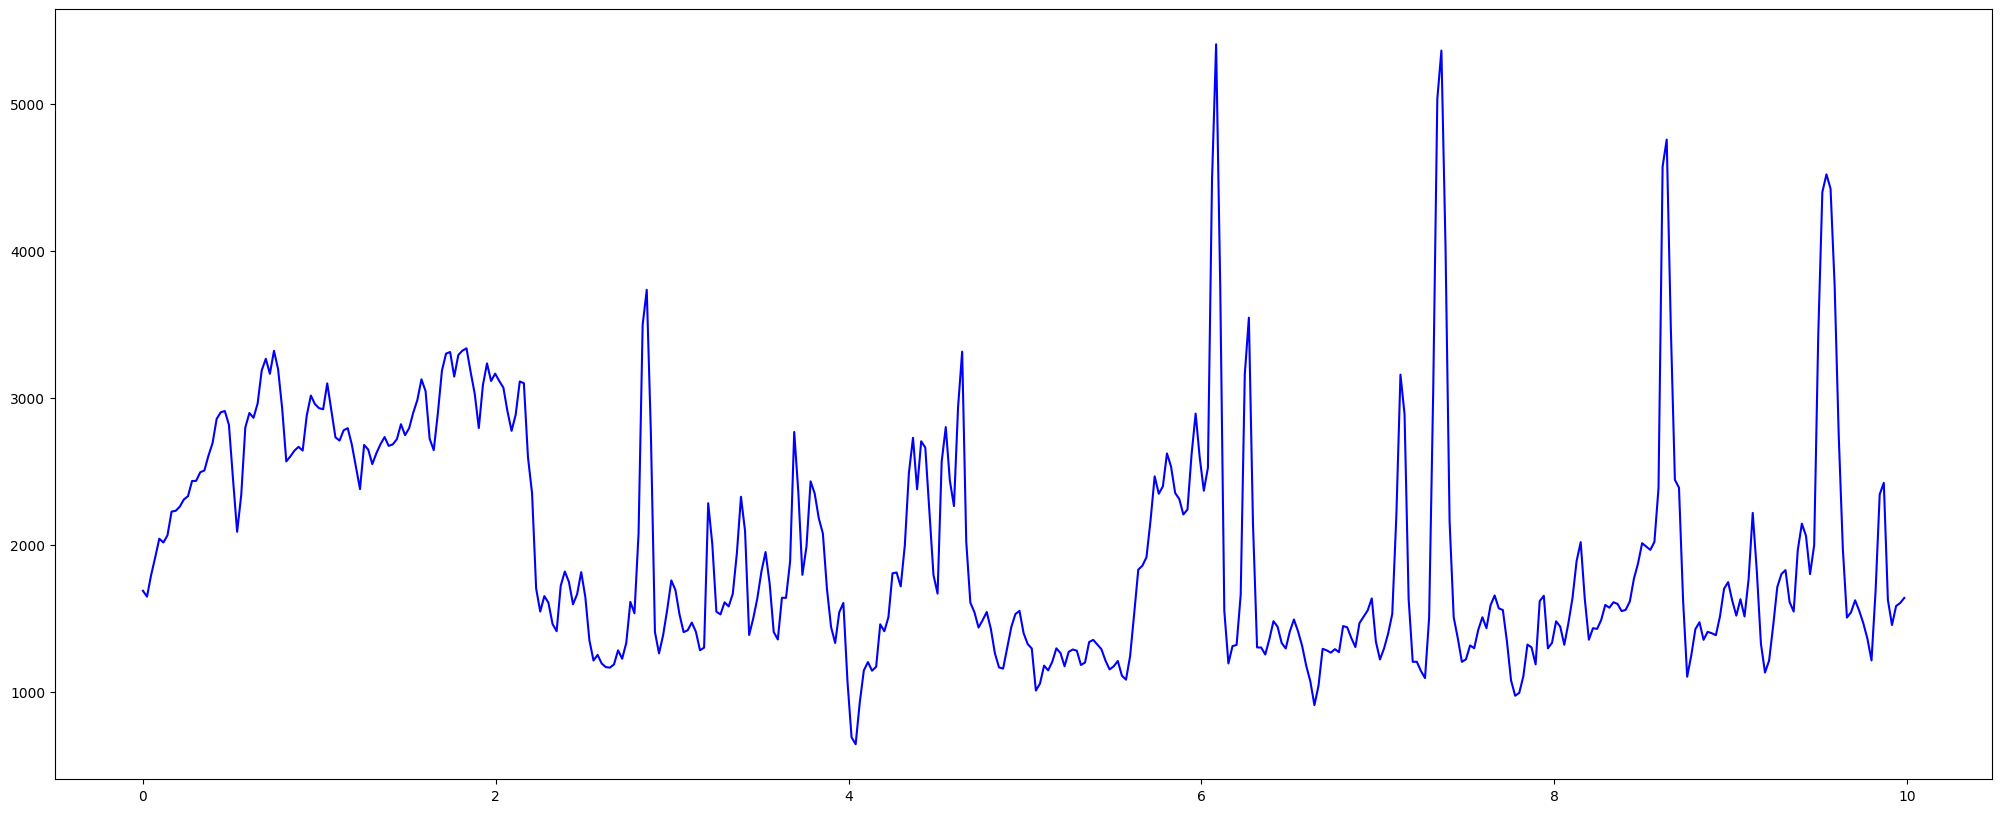

In [50]:
plt.figure(figsize=(25,10))
plt.plot(t, sc_audio, color="b")

plt.show()